# Importing and using an FMU for Model Exchange in Python

The most obvious obstacle for using a bare FMU for ModelExchange is its lack of an integrator. For this reason, classes **FMUModelExchangeV1** and **FMUModelExchangeV2** provide generic methods for the integration of FMUs for ModelExchange for FMI Version 1.0 and 2.0, respectively. Instances of these classes own the actual FMU instance and are able to advance the current state up to a specified point in time, including the proper handling of FMU-internal events. The classes also provide functionality for convenient input and output handling.

The following example demonstrates the basic usage of class **FMUModelExchangeV2** (usage of class FMUModelExchangeV1 is analogous).

## Loading the library and extracting an FMU

Load the FMI++ library into Python.

In [1]:
import fmipp

Specify the FMU's model name.

In [2]:
model_name = 'zigzag'

Specify the absolute path of the FMU. In this example, the FMU is supposed to be in the same directory as this notebook.

In [3]:
import os
work_dir = os.getcwd() # get current working directory (contains 'zigzag.fmu')
path_to_fmu = os.path.join( work_dir, 'data', 'win', model_name + '.fmu' ) # path to FMU

Extract the FMU to the current work directory. The return value is the URI to the folder containing the unzipped FMU.

In [4]:
uri_to_extracted_fmu = fmipp.extractFMU( path_to_fmu, work_dir )
print( 'URI of extracted FMU: {}'.format( uri_to_extracted_fmu ) )

directory already exists: C:\Users\widle\Desktop\Modelica 2019\tutorial\demo\zigzag
URI of extracted FMU: file:///C:/Users/widle/Desktop/Modelica%202019/tutorial/demo/zigzag


## Loading, instantiating and initialising the FMU

Specify the FMU's configuration parameters.

In [5]:
logging_on = False              # turn logging on/off
stop_before_event = False       # halt integration immediately before an event?
event_search_precision = 1e-2   # set precision for event detection
integrator_type = fmipp.bdf     # use Backward Differentiation Formula from CVODE
#integrator_type = fmipp.rk     # alternatively, use Runge-Kutta for integration

Load the FMU with the help of class **FMUModelExchangeV2**.

In [6]:
fmu = fmipp.FMUModelExchangeV2(
   uri_to_extracted_fmu, model_name,
   logging_on, stop_before_event, event_search_precision, integrator_type
   )

Instantiate the FMU and check the status.

In [7]:
status = fmu.instantiate( 'my_test_model_1' ) # instantiate model
assert status == fmipp.fmiOK # check status

Initialize parameter *k* to value *1.0*. Please note that you can refer to the parameter simply by name (no value reference number required).

In [8]:
status = fmu.setRealValue( 'k', 1.0 ) # set value of parameter 'k'
assert status == fmipp.fmiOK # check status

Initialize the FMU and check the status.

In [9]:
status = fmu.initialize() # initialize model
assert status == fmipp.fmiOK # check status

## Run a simulation with the FMU

Specify default step size of one simulation step (communication step size).

In [10]:
t = 0.0
stepsize = 0.45
tstop = 10.0

Run a simulation loop and store the results by repeatedly calling function *integrate(...)*. The function integrates the encapsulated model and advances the interal time of the FMU accoringly. It returns the time at which it halted the integration.

In case parameter *stop_before_event* is set to *True* when loading the FMU (see above), the integration stops directly before a state event occurs. Since it is set to *False* in this example, the simulation will simply be a sequence of integration steps of size *stepsize*.

In [11]:
x_sim = [ fmu.getRealValue( 'x' ) ]
t_sim = [ t ]

while ( t <= tstop ):
    t = fmu.integrate( t + stepsize ) # integrate model
    x = fmu.getRealValue( 'x' ) # retrieve output variable 'x'
    t_sim.append( t )
    x_sim.append( x )

Plot the results against the expected results.

<IPython.core.display.Javascript object>


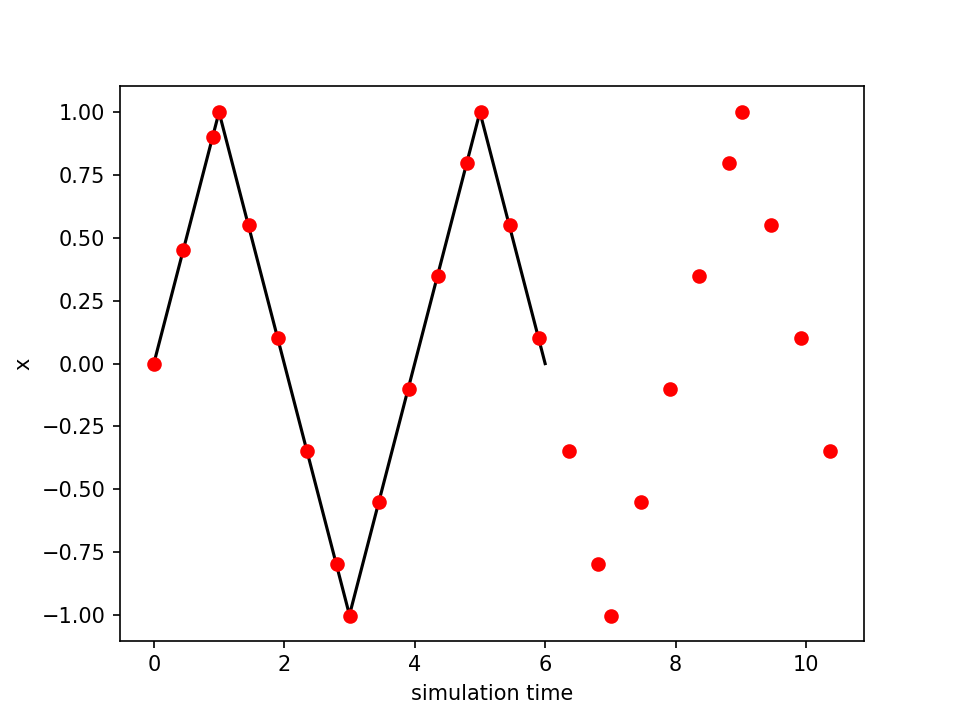

In [12]:
t_expected = [ 0., 1., 3., 5., 6. ]
x_expected = [ 0., 1.,-1., 1., 0. ]

%matplotlib notebook
import matplotlib.pyplot as plotter

plotter.plot( t_expected, x_expected, 'k-' ) # plot expected results
plotter.plot( t_sim, x_sim, 'ro' ) # plot simulated results

plotter.xlabel( 'simulation time' )
plotter.ylabel( 'x' )
plotter.draw()

Done.